# Data Loading & Read Clean File

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from datetime import datetime as dt
from numpy import sqrt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
normData = pd.read_csv('predictFutureSalesClean.csv')

In [3]:
# get rid of Unname column
normData.drop(normData.filter(regex="Unname"),axis=1, inplace=True)
normData

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,True,Кино - Blu-Ray,1,2013,999.0
1,2013-01-03,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
2,2013-01-05,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
3,2013-01-07,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0
4,2013-01-08,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442559,2015-10-10,33,25,7409,299.0,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,True,Музыка - CD локального производства,10,2015,299.0
1442560,2015-10-09,33,25,7460,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,True,Музыка - CD локального производства,10,2015,299.0
1442561,2015-10-14,33,25,7459,349.0,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,True,Музыка - CD локального производства,10,2015,349.0
1442562,2015-10-22,33,25,7440,299.0,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,True,Музыка - MP3,10,2015,299.0


In [4]:
normData.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'shop_name', 'item_name', 'item_category_id',
       'Required', 'item_category_name', 'date_month', 'date_year',
       'total_sales'],
      dtype='object')

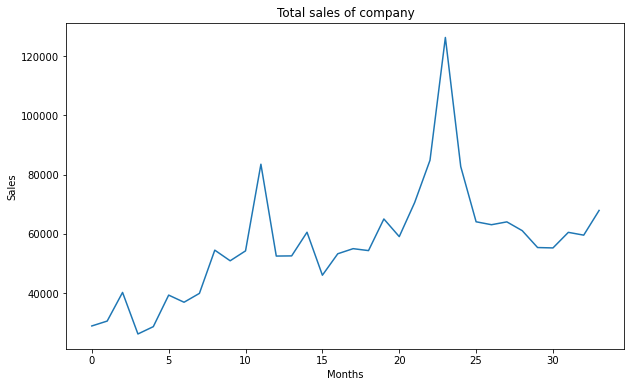

In [5]:
# Group by total monthly sales ...34 months

ts=normData.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(10,6))
plt.title('Total sales of company')
plt.xlabel('Months')
plt.ylabel('Sales')
indexedDataset = pd.DataFrame(ts)
#indexedDataset.head()
plt.plot(indexedDataset)
plt.show()

# Data Decomposition (General)

In [6]:
# Only keep date & item_cnt_day
Forecast_IP = normData[['date','item_cnt_day']]
Forecast_IP['date'] = pd.to_datetime(Forecast_IP['date'])
# Set date as index
Forecast_IP = Forecast_IP.set_index('date')
## Select time period for weekly aggregation
Forecast_IP_weekly = Forecast_IP['2013-01-01':'2015-10-31'].resample('W').sum()
Forecast_IP_weekly

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,item_cnt_day
date,
2013-01-06,7891.0
2013-01-13,6505.0
2013-01-20,5755.0
2013-01-27,6125.0
2013-02-03,5551.0
...,...
2015-10-04,17857.0
2015-10-11,12808.0
2015-10-18,14922.0


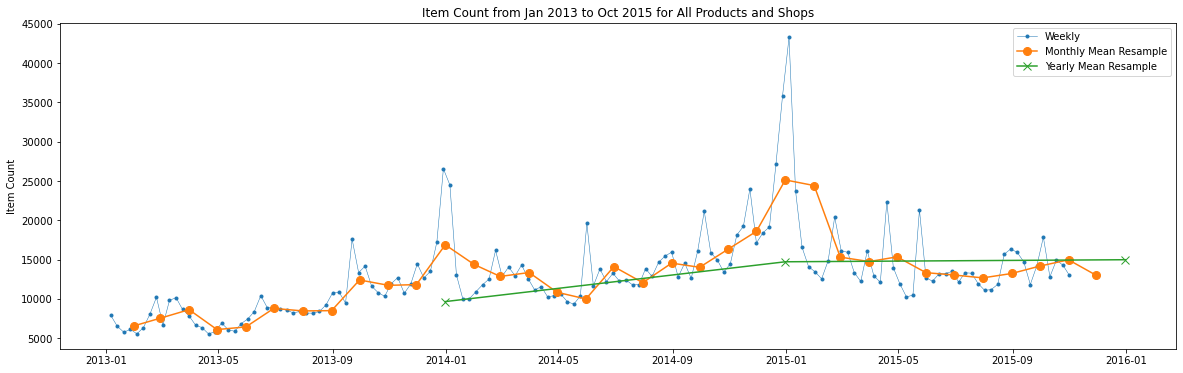

In [7]:
y = Forecast_IP_weekly['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Oct 2015 for All Products and Shops')
ax.legend();

In [8]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

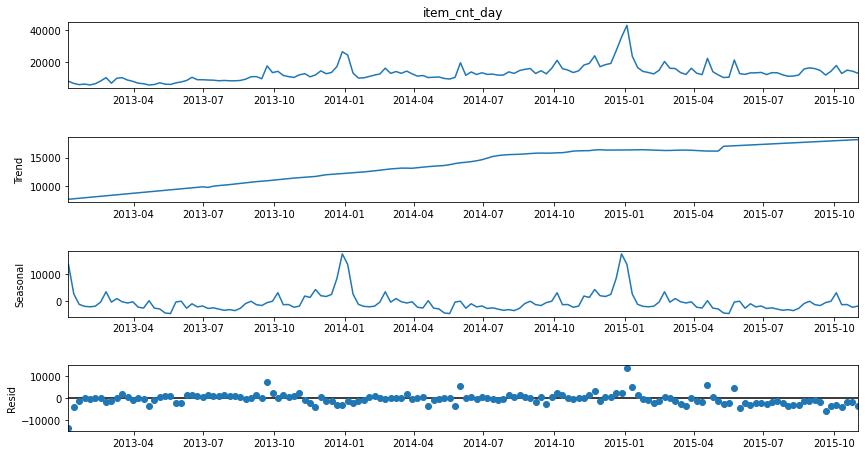

In [9]:
seasonal_decompose(y)

From observation from the four component, we can see the sales trend increasing from 2013 to 2015. 
The seasonal peak is 2014 & 2015 January. Seasonality and trend observed.

# Data Decomposition (Categorize by Item Category ID)

In [11]:
normData_filtered = normData[['date','item_cnt_day','item_category_id']]

In [13]:
#create unique list of names
UniqueNames = normData_filtered.item_category_id.unique()

#create a data frame dictionary to store your data frames
df = {elem : pd.DataFrame for elem in UniqueNames}

for key in df.keys():
    df[key] = normData_filtered[:][normData_filtered.item_category_id == key]

In [43]:
df[20]

,date,item_cnt_day,item_category_id
267279,2013-11-29,11.00000000,20
267280,2013-11-30,2.00000000,20
267397,2013-11-23,1.00000000,20
267398,2013-11-24,1.00000000,20
267399,2013-11-29,1.00000000,20
...,...,...,...
1442513,2015-10-09,1.00000000,20
1442514,2015-10-21,1.00000000,20
1442515,2015-10-30,1.00000000,20
1442516,2015-10-31,1.00000000,20


In [15]:
count=0
for elem in df:
    count+=1
print('Total Item Category is {}'.format(count))

Total Item Category is 60


In [16]:
# Only keep date & item_cnt_day
Forecast_IP_item20 = df[20][['date','item_cnt_day']]
Forecast_IP_item20['date'] = pd.to_datetime(Forecast_IP_item20['date'])
# Set date as index
Forecast_IP_item20 = Forecast_IP_item20.set_index('date')
## Select time period for weekly aggregation
Forecast_IP_item20_weekly = Forecast_IP_item20['2013-01-01':'2015-10-31'].resample('W').sum()
Forecast_IP_item20_weekly

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,item_cnt_day
date,
2013-11-24,65.0
2013-12-01,1680.0
2013-12-08,725.0
2013-12-15,453.0
2013-12-22,792.0
...,...
2015-10-04,941.0
2015-10-11,1233.0
2015-10-18,1436.0


In [17]:
## Validate the start date of item category 20
df_validate = normData.loc[normData['item_category_id']==20]
df_validate= df_validate.sort_values(by='date')
df_validate

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales
288906,2013-11-22,10,56,4271,2799.0,1.0,"Чехов ТРЦ ""Карнавал""","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,2799.0
269326,2013-11-22,10,26,4231,2518.9,2.0,"Москва ТЦ ""Ареал"" (Беляево)","Killzone: В плену сумрака [PS4, русская версия]",20,True,Игры - PS4,11,2013,5037.8
274310,2013-11-22,10,31,4271,2799.0,1.0,"Москва ТЦ ""Семеновский""","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,2799.0
269338,2013-11-22,10,26,4271,2799.0,2.0,"Москва ТЦ ""Ареал"" (Беляево)","Knack [PS4, русская версия]",20,True,Игры - PS4,11,2013,5598.0
289768,2013-11-22,10,54,4231,2799.0,2.0,"Химки ТЦ ""Мега""","Killzone: В плену сумрака [PS4, русская версия]",20,True,Игры - PS4,11,2013,5598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402785,2015-10-31,33,35,10202,1199.0,1.0,"Н.Новгород ТРЦ ""Фантастика""","Ведьмак 3: Дикая Охота - Дополнение ""Каменные ...",20,True,Игры - PS4,10,2015,1199.0
1404700,2015-10-31,33,57,7224,4499.0,1.0,"Якутск Орджоникидзе, 56",Uncharted: Натан Дрейк. Коллекция. Специальное...,20,True,Игры - PS4,10,2015,4499.0
1437795,2015-10-31,33,21,1586,5999.0,1.0,"Москва МТРЦ ""Афи Молл""","Assassin's Creed: Синдикат. Чаринг-Кросс [PS4,...",20,True,Игры - PS4,10,2015,5999.0
1420869,2015-10-31,33,18,7223,3999.0,2.0,"Красноярск ТЦ ""Июнь""","Uncharted: Натан Дрейк. Коллекция [PS4, русска...",20,True,Игры - PS4,10,2015,7998.0


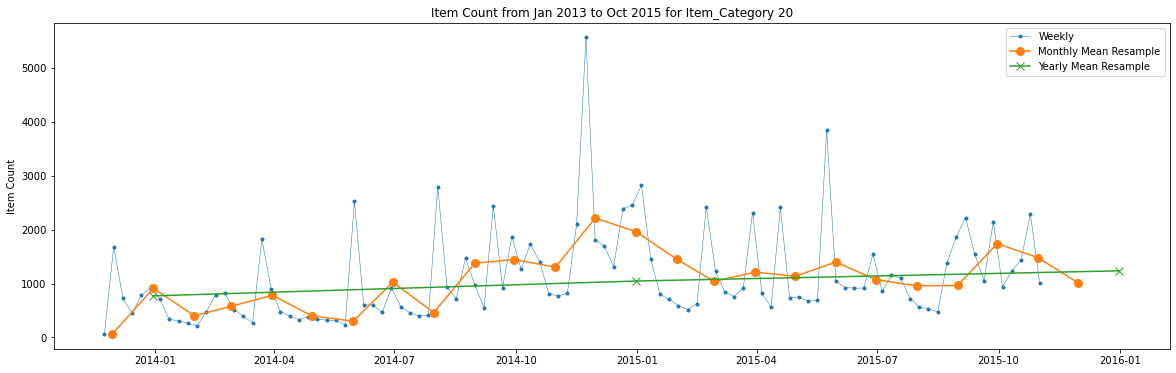

In [18]:
y = Forecast_IP_item20_weekly['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Oct 2015 for Item_Category 20')
ax.legend();

In [19]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y,model='additive', freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


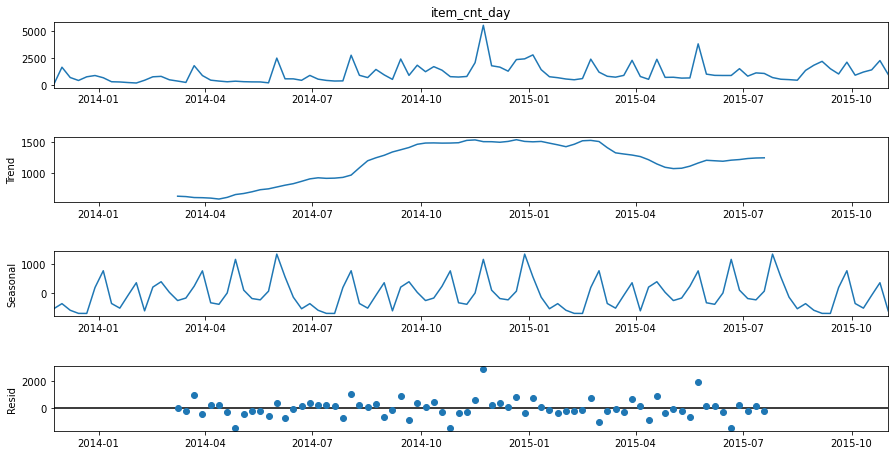

In [20]:
seasonal_decompose(y)

From observation, trend and  seasonality observed for item 20. 
Residual: also call noise, is the residual of original time series after seasonal and trend series are removed.

# Check Stationarity of a Time Series

Stationary mean the mean and standard deviation is not changing much over time

In [21]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

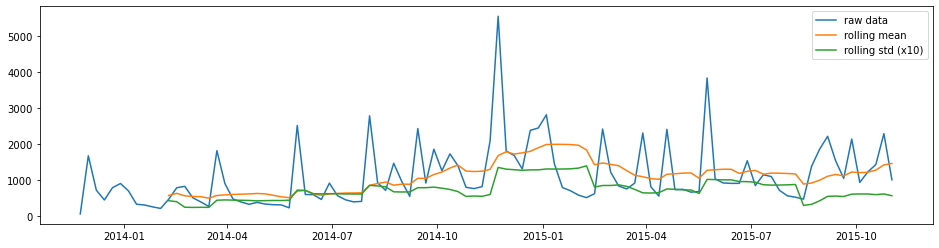

In [22]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

The ADF approach is essentially a statistical significance test that compares the p-value with the critical values and does hypothesis testing. Using this test, we can determine whether the processed data is stationary or not with different levels of confidence.

In [23]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [24]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -7.741
P-value = 0.000
Critical values :
	1%: -3.4968181663902103 - The data is  stationary with 99% confidence
	5%: -2.8906107514600103 - The data is  stationary with 95% confidence
	10%: -2.5822770483285953 - The data is  stationary with 90% confidence


Conclusion: Looking at both the visualization and ADF test, we can tell that our sample sales data is stationary. 
No need apply differecing or detrending to make the time series stationary

# Train Test Split

In [25]:
# Check the date at 70% of the dataset
Forecast_IP_item20_weekly.iloc[int(len(y)*0.7)]

item_cnt_day   820.00000000
Name: 2015-04-05 00:00:00, dtype: float64

In [26]:
y_to_train = y[:'2015-04-05'] # dataset to train
y_to_val = y['2015-04-06':] # last X months for test  
predict_date = (len(y) - len(y[:'2015-04-06'])+18) # the number of data points for the test set

In [27]:
predict_date

48

# Different Time Series Prediction Models

Simple Exponential Smoothing (SES) for data without trend or seasonality

Holt’s Linear Trend Method for data with a trend but no seasonality


Holt-Winters’ Seasonal Method for data with trend and/or seasonality


SARIMA for data with trend and/or seasonality

## Simple Exponential Smoothing (SES)

It uses for series with no trend or seasonality --> learn from latest data, use ytd data to predict today

Formula: L(t) = alpha*Y(t) +(1-alpha)*L(t-1) ==> using weighted average, and this formula decay exponential towards past

alpha= smoothing constant , btw 0 and 1;
Y(t) = most recent data point ;
L(t) = level at time t;
L(t-1) = previous level at time t;

alpha = 1 ==> past value have no influence over forecasts (undersmoothing)
alpha = 0 ==> past values have equal influence on forecasts (oversmoothing)

Final Formula : F(t+1) = F(t) + alpha*Error(t)

In [28]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 



def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 749.33


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


The Root Mean Squared Error of our forecasts with auto optimization is 725.46


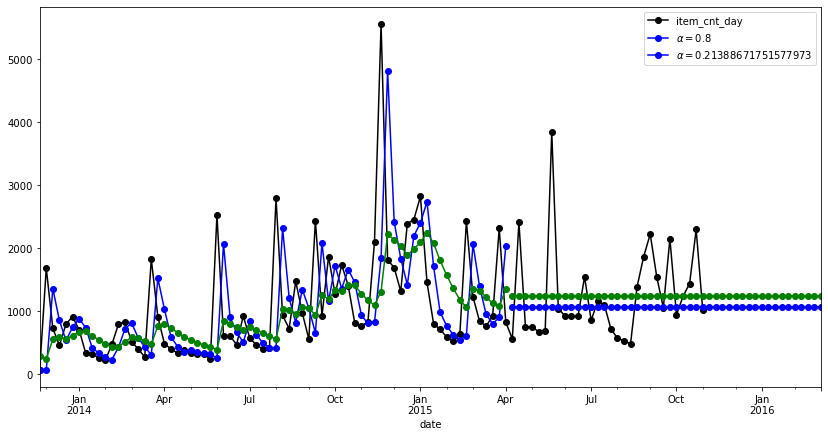

In [29]:
plt.figure()
ses(y, y_to_train,y_to_val,0.8,predict_date)

## Seasonal Arima (SARIMA)

Parameters:

trend elements:
p: Trend autoregression order
d: Trend difference order
q: Trend moving average order

Seasonal Elements
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

In order to get the best prediction, it’s important to find the values of SARIMA(p,d,q)(P,D,Q)m that optimize a metric of interest. In this example, we just use a "grid search" to iteratively explore different combinations of parameters.

The evaluation metric we’ll use for the grid search is the AIC (Akaike Information Criterion) value. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. In general, we want to pick the combination with the lowest AIC value.

In [30]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [31]:
sarima_grid_search(y,52)

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


The set of parameters with the minimum AIC is: SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:4.0


The grid search tested all possible combinations of variables, and printed out the set that resulted in the lowest AIC, and we can see that SARIMA(0, 0, 0)x(0, 1, 1, 52) has the lowest AIC value. Since this method chose the best parameters, we will use this method to fit our model and compare the results with all the previous models discussed above.

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L52       0.0657      0.295      0.223      0.824      -0.512       0.643
sigma2      1.674e+06   1.75e+05      9.546      0.000    1.33e+06    2.02e+06


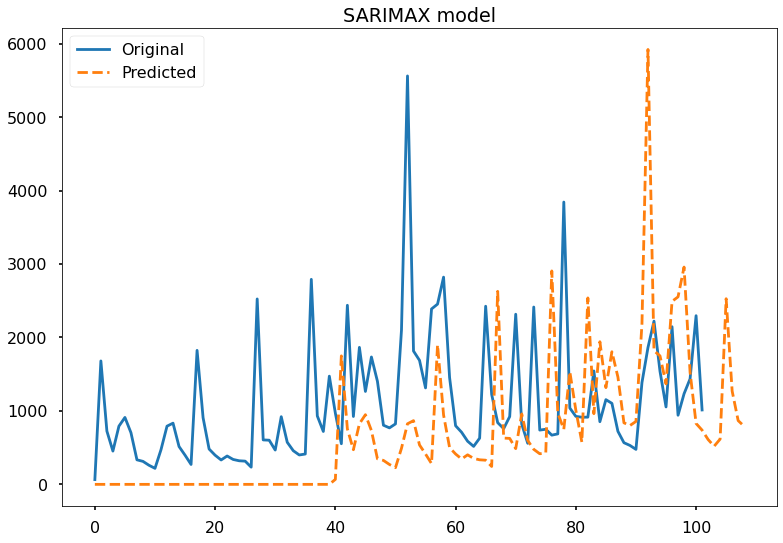

In [32]:
# SARIMA

model = SARIMAX(y, order=(0, 0, 0), seasonal_order=(0,1,1,52))
model_fit = model.fit(disp=False)
print(model_fit.summary().tables[1])


# make prediction
yhat = model_fit.predict(12, len(y)+18)

dataList = list(y)
yhatList = list(yhat)

plt.style.use('seaborn-poster')
plt.figure()
plt.plot(dataList, label='Original')
plt.plot(yhatList, ls='--', label='Predicted')
plt.legend(loc='best')
plt.title('SARIMAX model')
plt.show()


In [33]:
rmse = sqrt(mean_squared_error(dataList,yhatList[0:102]))
print('SARIMA RMSE: %.1f' % rmse)

SARIMA RMSE: 1181.3


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1007      0.180     -0.559      0.576      -0.454       0.252
ar.L2         -0.0826      0.207     -0.399      0.690      -0.488       0.323
ma.L1         -0.8330      0.147     -5.662      0.000      -1.121      -0.545
ma.S.L52      -0.9972      0.196     -5.082      0.000      -1.382      -0.613
sigma2      6.191e+05   3.17e-07   1.95e+12      0.000    6.19e+05    6.19e+05


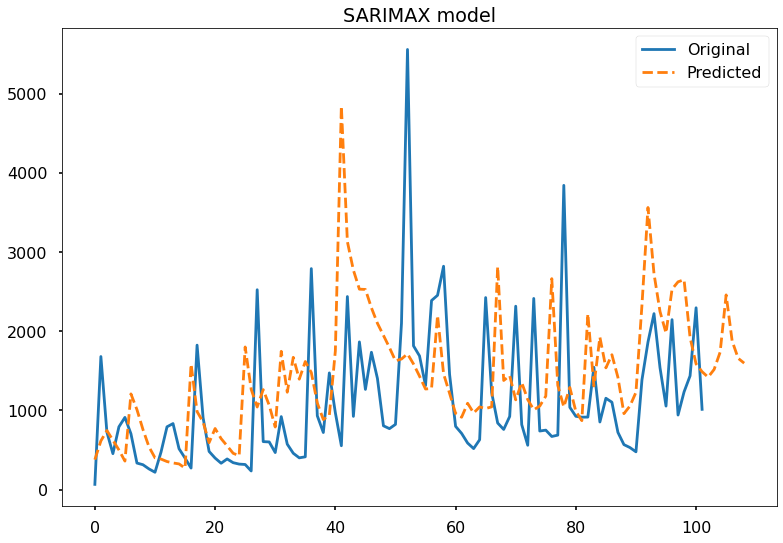

In [34]:
# SARIMA

model = SARIMAX(y, order=(2, 1, 1), seasonal_order=(0,1,1,52))
model_fit = model.fit(disp=False)
print(model_fit.summary().tables[1])


# make prediction
yhat = model_fit.predict(12, len(y)+18)

dataList = list(y)
yhatList = list(yhat)

plt.style.use('seaborn-poster')
plt.figure()
plt.plot(dataList, label='Original')
plt.plot(yhatList, ls='--', label='Predicted')
plt.legend(loc='best')
plt.title('SARIMAX model')
plt.show()


In [35]:
rmse = sqrt(mean_squared_error(dataList,yhatList[0:102]))
print('SARIMA RMSE: %.1f' % rmse)

SARIMA RMSE: 1021.0


## ARIMA

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION

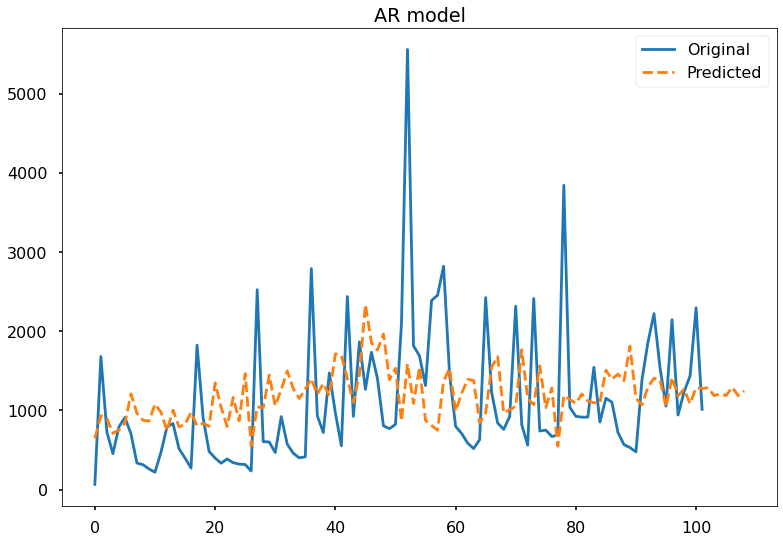

In [36]:
# AR model 

model = AR(y)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(12, len(y)+18) # predict N ahead of the last one

dataList = list(y)
yhatList = list(yhat)

plt.style.use('seaborn-poster')
plt.figure()
plt.plot(dataList, label='Original')
plt.plot(yhatList, ls='--', label='Predicted')
plt.legend(loc='best')
plt.title('AR model')
plt.show()

In [37]:
rmse = sqrt(mean_squared_error(dataList,yhatList[0:102]))
print('AR RMSE: %.1f' % rmse)

AR RMSE: 855.9


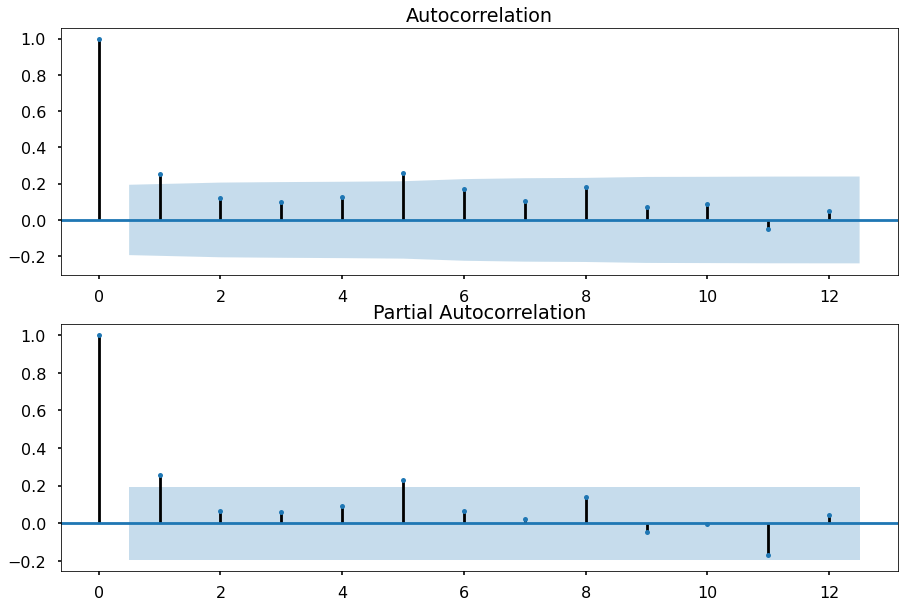

In [38]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
# Get p and q for ARIMA

plt.figure(figsize=(15,10))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(y, lags=12, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(y, lags=12, ax=ax)
#plt.tight_layout()
plt.show()

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


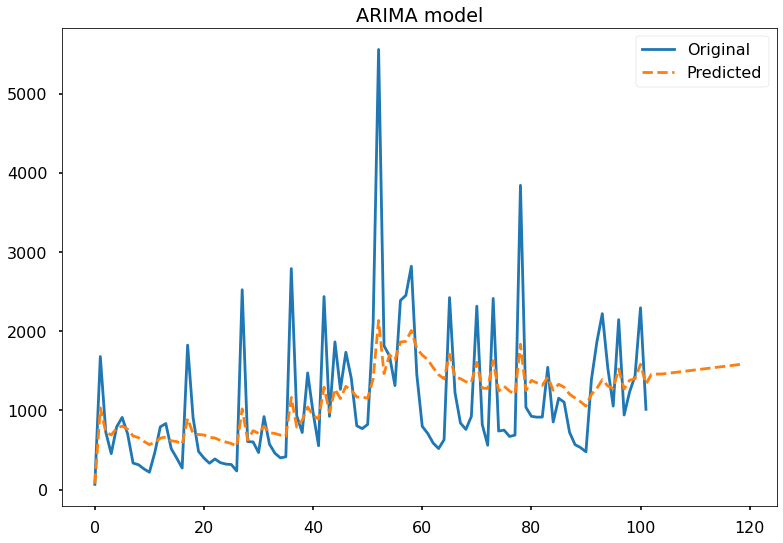

In [39]:
# ARIMA model

model = ARIMA(y, order=(2, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1, len(y)+18, typ='levels')

dataList = list(y)
yhatList = list(yhat)

plt.style.use('seaborn-poster')
plt.figure()
plt.plot(dataList, label='Original')
plt.plot(yhatList, ls='--', label='Predicted')
plt.legend(loc='best')
plt.title('ARIMA model')
plt.show()

In [40]:
rmse = sqrt(mean_squared_error(dataList,yhatList[0:102]))
print('ARIMA RMSE: %.1f' % rmse)

ARIMA RMSE: 636.5


# Monthly Prediction

In [44]:
ts=normData.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-31', freq = 'MS')
ts=ts.reset_index()
ts

,index,item_cnt_day
0,2013-01-01,28855.00000000
1,2013-02-01,30508.00000000
2,2013-03-01,40183.00000000
3,2013-04-01,26146.00000000
4,2013-05-01,28622.00000000
5,2013-06-01,39281.00000000
6,2013-07-01,36870.00000000
7,2013-08-01,39866.00000000
8,2013-09-01,54471.00000000
9,2013-10-01,50881.00000000


In [45]:
from fbprophet import Prophet
# prophet REQUIRES a pandas df at the below config 
# date column named as DS and the value column as Y
ts.columns=['ds','y']
model = Prophet(yearly_seasonality=True, weekly_seasonality=True) # instantiate Prophet with only yearly seasonality 
model.fit(ts) # fit the model with the ts dataframe

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
# predict for six months in the furure and MS - monthly = frequency
future = model.make_future_dataframe(periods = 6, freq = 'MS')  
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,30870.61248499,26949.49665837,34810.31299249
1,2013-02-01,31002.98815533,26794.83371936,35177.74071083
2,2013-03-01,40156.56379732,36127.15418773,44206.72998379
3,2013-04-01,24506.94320231,20232.19547800,28568.17228666
4,2013-05-01,25970.83738624,22006.85819525,30087.63822638
5,2013-06-01,35693.81200676,31995.71719059,39691.93046090
6,2013-07-01,35466.65454629,31279.19133752,39611.74717564
7,2013-08-01,41872.04268049,37955.18051180,45908.99307177
8,2013-09-01,51060.11110393,47181.14529614,54974.87626969
9,2013-10-01,53234.87711923,49482.78687044,57386.79457213


In [47]:
dataList = list(indexedDataset.item_cnt_day.values)

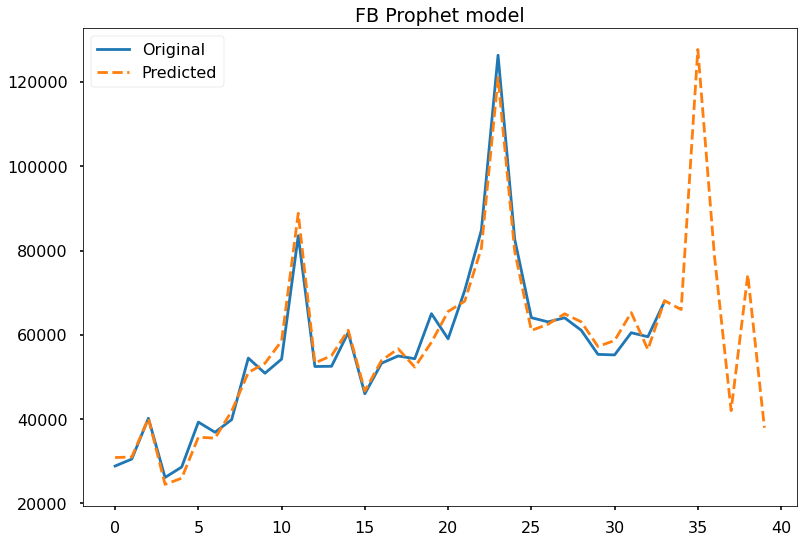

In [48]:
plt.style.use('seaborn-poster')
plt.figure()
plt.plot(dataList, label='Original')
plt.plot(forecast['yhat'], ls='--', label="Predicted")
plt.legend(loc='best')
plt.title('FB Prophet model')
plt.show()

In [49]:
# RMSE

rmse = sqrt(mean_squared_error(dataList,forecast['yhat'][0:34]))
print('Val RMSE: %.1f' % rmse)

Val RMSE: 3080.9
